In [1]:
import cv2
import math
from matplotlib import pyplot as plt

In [2]:
impath = "test.jpg"
angle_deg = 24
k = 0.75
interpol = cv2.INTER_CUBIC #INTER_NEAREST INTER_LINEAR INTER_CUBIC

In [3]:
def maxRect(w, h, angle):
    if w <= 0 or h <= 0:
        return 0,0
    
    width_is_longer = w >= h
    side_long, side_short = (w,h) if width_is_longer else (h,w)
    
    sin_a, cos_a = abs(math.sin(angle)), abs(math.cos(angle))
    if side_short <= 2.*sin_a*cos_a*side_long or abs(sin_a-cos_a) < 1e-10:
        x = 0.5*side_short
        wr,hr = (x/sin_a,x/cos_a) if width_is_longer else (x/cos_a,x/sin_a)
    else:
        cos_2a = cos_a*cos_a - sin_a*sin_a
        wr,hr = (w*cos_a - h*sin_a)/cos_2a, (h*cos_a - w*sin_a)/cos_2a
    
    return int(wr), int(hr)

def draw(im):
    plt.figure(figsize=(14, 14))
    plt.axis('off')
    plt.imshow(im)
    plt.plot()

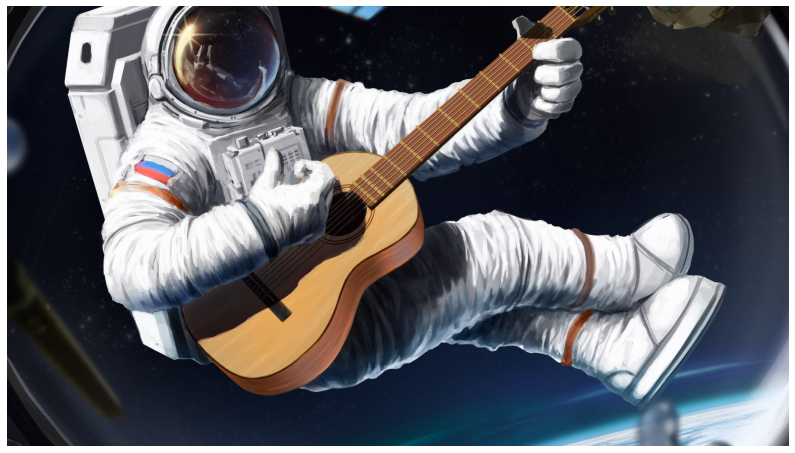

In [4]:
image = cv2.imread(impath)
image = image[:,:,::-1]
draw(image)

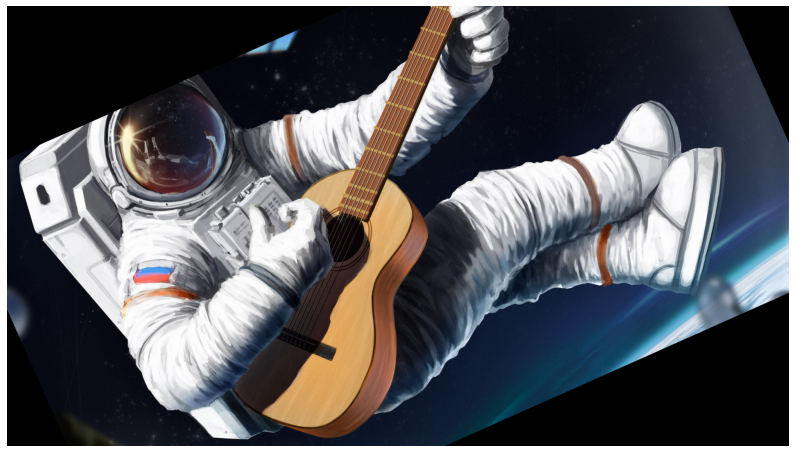

In [5]:
(h, w) = image.shape[:2]
(cX, cY) = (w // 2, h // 2)
M = cv2.getRotationMatrix2D((cX, cY), angle_deg, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
draw(rotated)

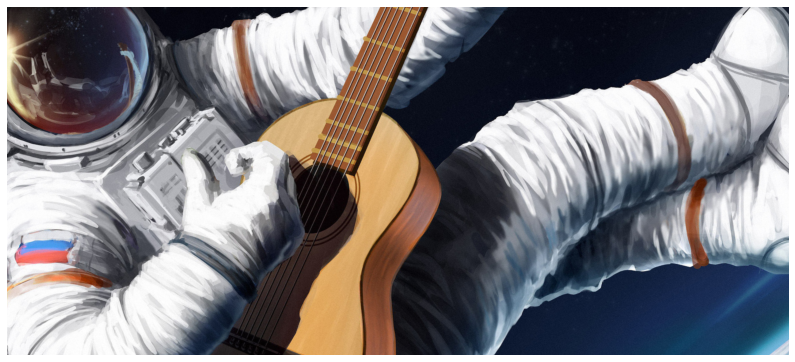

In [6]:
(new_w, new_h) = maxRect(w, h, math.radians(angle_deg))
if new_w > w:
    new_w = w
if new_h > h:
    new_h = h

(coord_w, coord_h) = ((w - new_w)//2 + (w - new_w)%2, (h - new_h)//2 + (h - new_h)%2)
cropped = rotated[coord_h:(coord_h + new_h), coord_w:(coord_w + new_w)]
status = cv2.imwrite('cropped.bmp', cropped[:,:,::-1])
draw(cropped)

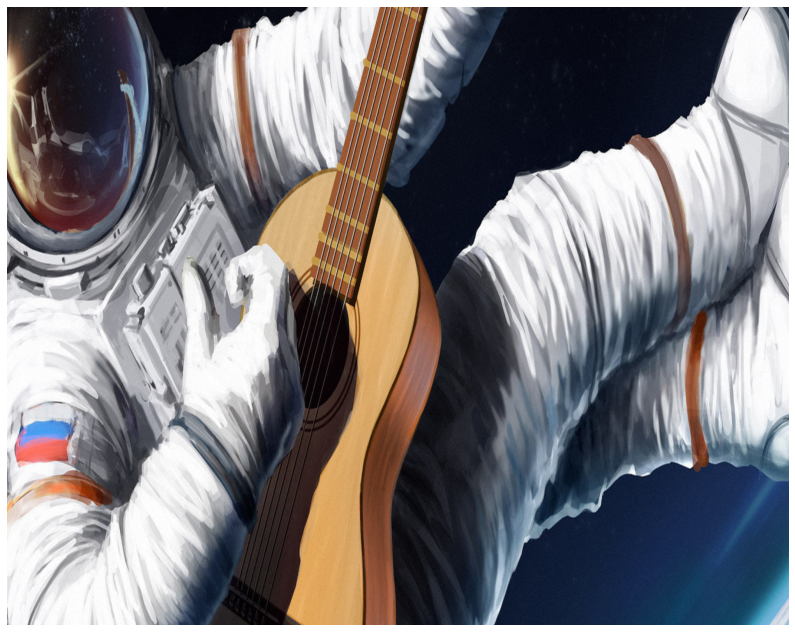

In [7]:
scaled = cv2.resize(cropped, dsize=(int(new_w*k), int(new_h/k)), fx=k, fy=1/k, interpolation=interpol)
draw(scaled)

In [8]:
result = scaled[:,:,::-1]
status = cv2.imwrite('result.bmp', result)